In [ ]:
#example of data augmentation
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
#converting data directory to pathlib
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [ ]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/4363734507_5cc4ed6e01.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg')]

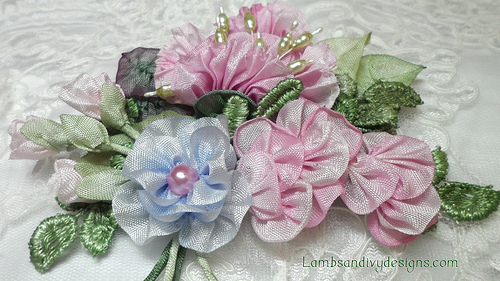

In [ ]:
PIL.Image.open(str(roses[2]))

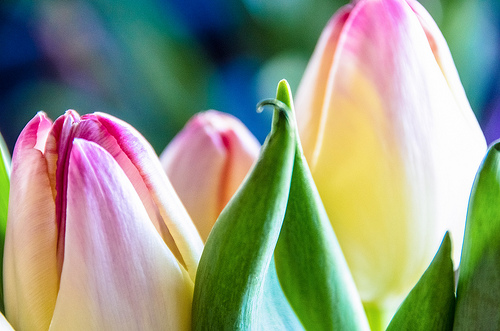

In [ ]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[1]))

In [ ]:
flowers_images_dict = {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*"))
}


In [ ]:
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4,
}

array([[[ 38, 127, 201],
        [ 34, 128, 201],
        [ 40, 124, 206],
        ...,
        [ 39, 252, 233],
        [ 35, 253, 236],
        [ 33, 253, 237]],

       [[ 43, 135, 206],
        [ 36, 131, 200],
        [ 31, 119, 196],
        ...,
        [ 46, 253, 238],
        [ 41, 254, 238],
        [ 37, 254, 239]],

       [[ 30, 125, 198],
        [ 40, 134, 207],
        [ 39, 124, 204],
        ...,
        [ 39, 252, 237],
        [ 38, 254, 237],
        [ 38, 254, 237]],

       ...,

       [[ 67,  62, 117],
        [ 82,  67, 129],
        [ 83,  56, 129],
        ...,
        [ 53,  63, 127],
        [ 54,  70, 129],
        [ 55,  67, 125]],

       [[ 73,  64, 121],
        [ 83,  62, 131],
        [ 79,  59, 132],
        ...,
        [ 49,  73, 133],
        [ 47,  69, 127],
        [ 45,  68, 124]],

       [[ 71,  62, 118],
        [ 82,  61, 129],
        [ 79,  59, 132],
        ...,
        [ 56,  65, 128],
        [ 52,  62, 122],
        [ 53,  61, 120]]], dtype=uint8)
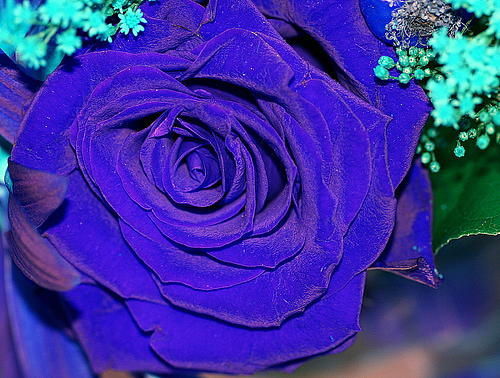

In [ ]:

img = cv2.imread(str(flowers_images_dict["roses"][0]))
# Display the image (optional)
img# it gives a numpy array according to the path


In [ ]:
img.shape

(378, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:

x, y = [], []
for flower_name, images in flowers_images_dict.items():  # flowers_images_dict
    print(flower_name)
    print(len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
y[:5]

[0, 0, 0, 0, 0]

array([[[ 36, 130, 201],
        [ 11,  81, 177],
        [ 19, 177, 208],
        ...,
        [ 90, 252, 231],
        [ 43, 243, 228],
        [ 38, 253, 237]],

       [[ 38, 138, 209],
        [  9,  98, 187],
        [ 16, 181, 210],
        ...,
        [ 78, 242, 216],
        [ 36, 236, 226],
        [ 34, 253, 237]],

       [[ 40, 142, 205],
        [ 15, 111, 189],
        [ 19, 180, 210],
        ...,
        [ 79, 233, 205],
        [ 29, 229, 218],
        [ 38, 250, 236]],

       ...,

       [[ 70,  60, 126],
        [ 84,  54, 143],
        [ 84,  54, 149],
        ...,
        [ 56,  78, 139],
        [ 55,  76, 135],
        [ 48,  75, 128]],

       [[ 77,  66, 128],
        [ 82,  56, 142],
        [ 89,  53, 149],
        ...,
        [ 53,  74, 137],
        [ 52,  72, 133],
        [ 54,  71, 128]],

       [[ 81,  62, 129],
        [ 78,  55, 144],
        [ 82,  54, 149],
        ...,
        [ 50,  68, 140],
        [ 49,  69, 128],
        [ 49,  66, 124]]], dtype=uint8)
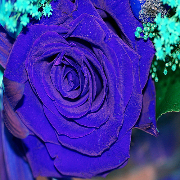

In [ ]:
x[0]

In [ ]:
x = np.array(x)
y = np.array(y)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
len(x_train)

2752

In [ ]:
len(x_test)

918

In [ ]:
# scalling or normalizing by deviding with 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.30588235, 0.43529412, 0.45882353],
        [0.31764706, 0.43529412, 0.47843137],
        [0.33333333, 0.43529412, 0.48627451],
        ...,
        [0.24313725, 0.09019608, 0.01568627],
        [0.2       , 0.11372549, 0.05098039],
        [0.19607843, 0.15686275, 0.08235294]],

       [[0.49019608, 0.57647059, 0.62745098],
        [0.49411765, 0.56862745, 0.63137255],
        [0.41960784, 0.47843137, 0.54509804],
        ...,
        [0.16470588, 0.08627451, 0.03529412],
        [0.15686275, 0.11764706, 0.06666667],
        [0.22745098, 0.20392157, 0.14901961]],

       [[0.41176471, 0.45490196, 0.52156863],
        [0.41568627, 0.44705882, 0.52156863],
        [0.34117647, 0.36470588, 0.43529412],
        ...,
        [0.08627451, 0.07058824, 0.03137255],
        [0.11764706, 0.10980392, 0.06666667],
        [0.26666667, 0.25098039, 0.20784314]],

       ...,

       [[0.        , 0.06666667, 0.        ],
        [0.        , 0.05882353, 0.00392157],
        [0.01568627, 0

In [ ]:
num_classes=5
#bulding the cnn model
model = Sequential()
model.add(layers.Conv2D(16,3,padding="same",activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,3,padding="same",activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,3,padding="same",activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())

In [ ]:
# dense of layer
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(num_classes))

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
    )

In [ ]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.4187 - loss: 1.3674
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6079 - loss: 0.9688
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7028 - loss: 0.7944
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8028 - loss: 0.5713
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8843 - loss: 0.3494
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9517 - loss: 0.1767
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9772 - loss: 0.0864
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9853 - loss: 0.0544
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9876 - loss: 0.0491
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9917 - loss: 0.0386


In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.6583 - loss: 1.7667


[1.792051076889038, 0.6470588445663452]

In [ ]:
predictions=model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step


array([[ -2.9177246 ,   4.876741  ,   3.5714157 ,  -7.500594  ,
          3.2146358 ],
       [  7.403709  ,  -1.9615496 ,  -2.4570773 ,  -4.0331683 ,
          2.7796645 ],
       [ -3.6961608 ,  -2.6884935 ,   9.61572   ,  -8.817106  ,
          1.0183152 ],
       ...,
       [ -6.348495  , -21.765812  ,   0.2916577 ,  17.222124  ,
         -1.1644715 ],
       [  6.710892  ,  -8.040905  ,  -4.367268  ,  -0.19713968,
          6.460632  ],
       [  0.6164288 ,  -9.300293  ,  -1.2235833 ,   5.928624  ,
         -1.4852256 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.9013650e-01, 8.4803760e-05, 5.1666604e-05, 1.0683718e-05,
       9.7162370e-03], dtype=float32)>

In [ ]:
np.argmax(score)


0

In [ ]:
y_test[1]

0

In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# instead of:
# data_augmentation = keras.Sequential([
#     layers.experimental.preprocessing.RandomZoom(0.3)
# ])

# use:
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.9),  # RandomZoom is now directly under layers
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])



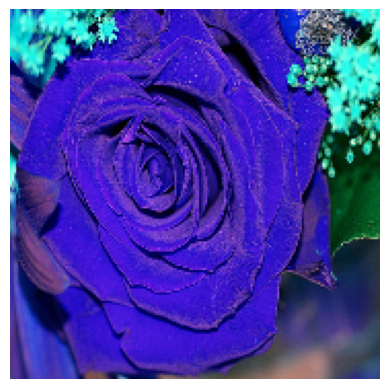

In [ ]:
plt.axis("off")
plt.imshow(x[0])

In [ ]:
num_classes=5
#bulding the cnn model
model = Sequential()
model.add(keras.Input(shape=(180, 180, 3)))
model.add(data_augmentation)
model.add(layers.Conv2D(16,3,padding="same",activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,3,padding="same",activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,3,padding="same",activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(num_classes))


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
    )

In [ ]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.3461 - loss: 1.5115
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.5226 - loss: 1.1678
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.5698 - loss: 1.0616
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5998 - loss: 0.9918
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6194 - loss: 0.9722
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6164 - loss: 0.9596
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6382 - loss: 0.9203
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6607 - loss: 0.8558
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6744 - loss: 0.8363
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6904 - loss: 0.7926


In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.6671 - loss: 0.8540


[0.8392141461372375, 0.6884531378746033]